### Implemented by Federico Zocco
### Last update: 13 September 2023
   
This notebook performs regression using TensorFlow for tracking the coordinates of the contact points between an inhaler and a robotic gripper. The model input are images. The purpose of such a vision system is the automation of the disassebly of inhalers for repair and future reuse [4,5].

REFERENCES:

[1] Discussion on regression from images using TensorFlow: https://datascience.stackexchange.com/questions/106600/how-to-perform-regression-on-image-data-using-tensorflow

[2] TensorFlow tutorial on regression: https://www.tensorflow.org/tutorials/keras/regression

[3] TensorFlow tutorial on saving and loading models: https://www.tensorflow.org/tutorials/keras/save_and_load

[4] Source paper of this code: https://arxiv.org/abs/2309.04763

[5] What is a circular economy: https://ellenmacarthurfoundation.org/topics/circular-economy-introduction/overview

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

os.chdir('drive/MyDrive/regression')

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Load the dataset of images and labels as Numpy arrays; each image was resized to be 128 x 128:

In [ ]:
X = np.load('InhPoints_50images128x128.npy') # load resized images
y = np.load('InhPoints_50labels.npy')

Normalize the images:

In [ ]:
X = X/255 # normalization

In [ ]:
X = X.astype(np.float32)
y = y.astype(np.float32)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(3, 3, activation='relu'),
  tf.keras.layers.Conv2D(3, 3, activation='relu'),
  tf.keras.layers.Conv2D(3, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(3, 3, activation='relu'),
  tf.keras.layers.Conv2D(3, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(3, 3, activation='relu'),
  tf.keras.layers.Conv2D(3, 3, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dense(units=4) # 4 outputs: x1, y1, x2, y2 (i.e. x and y of P1 and P2, respectively)
])

In [ ]:
model.compile(loss='mean_squared_error', optimizer="adam")

Evaluate the prediction errors BEFORE training (in centimeters):

In [ ]:
error_matrix = np.array([])

num_test_samples = X.shape[0]
for i in range(num_test_samples):
  sample = np.expand_dims(X[i], axis=0)
  sample_error = abs(y[i]- model.predict(sample, batch_size=1))
  error_matrix = np.append(error_matrix, sample_error)

print(error_matrix.reshape(num_test_samples, 4))
print('ERROR MEAN:', np.mean(error_matrix),'ERROR STANDARD DEVIATION:', np.std(error_matrix))

1/1 [==============================] - 0s 33ms/step
[[ 4.86849308  6.90714169  2.5591383   7.85206127]
 [ 7.56745052  5.40587997  5.96163034  6.95179319]
 [ 4.96696091  7.00687456  3.05997491  5.85094643]
 [ 9.97146225  5.00729942 12.55703735  5.95545149]
 [16.46674538  4.20704556 15.46143436  6.75214672]
 [23.46971893  5.90903282 21.86256981  4.34971428]
 [25.76598167  5.00819016 27.96007729  3.45316124]
 [32.87082291  5.70803213 30.86111641  3.94880366]
 [36.86916733  5.00577211 36.95690918  7.45176888]
 [36.16930008  5.20756578 38.4609108   3.45347905]
 [ 2.96923256  9.80850601  5.16113949  8.75157356]
 [ 7.96953487 11.40491962  8.5606575   8.95141506]
 [15.06934834 11.00710201 12.95947456 11.95259666]
 [21.27399063 10.904212   23.95970535 11.74664593]
 [23.77287483 12.00653076 23.85654068  9.25378036]
 [29.96986961 12.40619659 27.35882759 12.14904118]
 [34.17538452 13.20723915 32.86037827 11.04931355]
 [36.47798538 10.10196972 38.06212997 12.05118847]
 [22.37550163 13.00651264 25.0

Train the model:

In [ ]:
history = model.fit(X, y, epochs=200, batch_size=2, verbose=1)

Epoch 1/200
25/25 [==============================] - 7s 8ms/step - loss: 236.9953
Epoch 2/200
25/25 [==============================] - 0s 8ms/step - loss: 122.4345
Epoch 3/200
25/25 [==============================] - 0s 8ms/step - loss: 116.1680
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 121.8465
Epoch 5/200
25/25 [==============================] - 0s 8ms/step - loss: 125.4008
Epoch 6/200
25/25 [==============================] - 0s 8ms/step - loss: 114.3794
Epoch 7/200
25/25 [==============================] - 0s 8ms/step - loss: 114.9185
Epoch 8/200
25/25 [==============================] - 0s 8ms/step - loss: 145.7226
Epoch 9/200
25/25 [==============================] - 0s 8ms/step - loss: 117.5857
Epoch 10/200
25/25 [==============================] - 0s 7ms/step - loss: 115.7262
Epoch 11/200
25/25 [==============================] - 0s 8ms/step - loss: 123.9105
Epoch 12/200
25/25 [==============================] - 0s 8ms/step - loss: 117.7576
Epoch 13/200


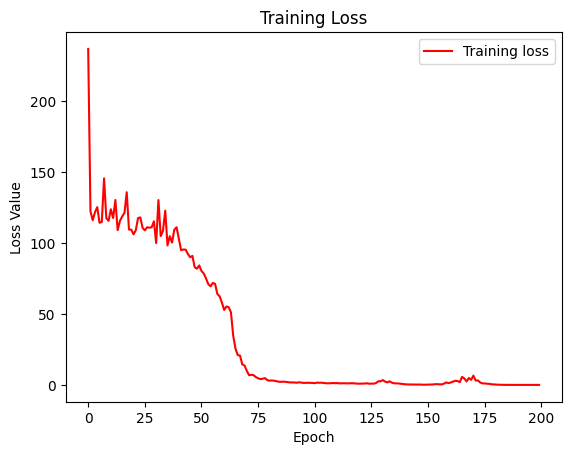

In [ ]:
loss = history.history['loss']

plt.figure()
plt.plot(history.epoch, loss, 'r', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

Evaluate the prediction errors AFTER training (in centimeters):

In [ ]:
error_matrix = np.array([])

num_test_samples = X.shape[0]
for i in range(num_test_samples):
  sample = np.expand_dims(X[i], axis=0)
  sample_error = abs(y[i]- model.predict(sample, batch_size=1))
  error_matrix = np.append(error_matrix, sample_error)

print(error_matrix.reshape(num_test_samples, 4))
print('ERROR MEAN:', np.mean(error_matrix),'ERROR STANDARD DEVIATION:', np.std(error_matrix))

1/1 [==============================] - 0s 19ms/step
[[0.09605074 0.06870413 0.03083324 0.16794491]
 [0.09590626 0.22375154 0.16505861 0.07411337]
 [0.1651001  0.19921017 0.16300964 0.17302895]
 [0.16930962 0.07919693 0.13991928 0.09797049]
 [0.14647865 0.03179359 0.2078476  0.06168985]
 [0.00084686 0.13418913 0.14627647 0.05115461]
 [0.08990097 0.15702486 0.01173592 0.1984446 ]
 [0.13160706 0.02834511 0.16613388 0.04375124]
 [0.11562729 0.08676052 0.06910324 0.13159943]
 [0.0215416  0.10094786 0.16139984 0.22243142]
 [0.04302001 0.08807755 0.07083559 0.04500484]
 [0.04747391 0.15879726 0.0967598  0.08693123]
 [0.11691666 0.13433266 0.06690979 0.12465191]
 [0.07217216 0.0193224  0.12316322 0.03721809]
 [0.05429077 0.18990803 0.03141785 0.04791451]
 [0.06558037 0.09256172 0.0364399  0.0860405 ]
 [0.06580734 0.04466343 0.10014725 0.1464653 ]
 [0.23394012 0.0735693  0.14733505 0.08642101]
 [0.03316307 0.12145138 0.0065918  0.15626144]
 [0.12577629 0.07807446 0.0713954  0.04792213]
 [0.0641

Save the entire model:

In [ ]:
!mkdir -p saved_model
model.save('saved_model')